In [46]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
mpl.style.use("seaborn")
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
models_layers_conf = [
    [],
    [[128,'relu']],
    [[128,'relu'],[64,'relu']],
    [[128,'relu'],[128,'relu']],
    [[128,'relu'],[128,'relu'],[64,'relu']],
]
models_layers_names = []
for i,l_conf in enumerate(models_layers_conf):
    l_name=""
    for l in l_conf:
        l_name = "{}__{}_{}".format(l_name, l[0], l[1])
    models_layers_names.append(l_name)

models_history_files = ["history{}.csv".format(name) for name in models_layers_names]
models_history_files

['history.csv',
 'history__128_relu.csv',
 'history__128_relu__64_relu.csv',
 'history__128_relu__128_relu.csv',
 'history__128_relu__128_relu__64_relu.csv']

## Read data from CSV files

In [6]:
data:pd.DataFrame = None
for i,name in enumerate(models_layers_names):
    tmp_df = pd.read_csv(models_history_files[i])
    tmp_df["model"] = name if name != "" else "basic"
    if data is None:
        data = tmp_df
    else:
        data = pd.concat([data, tmp_df], axis=0)
data

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,model
0,0,1.301721,0.682817,0.819071,0.8262,basic
1,1,0.720341,0.837883,0.610475,0.8599,basic
2,2,0.589180,0.858300,0.527242,0.8740,basic
3,3,0.526451,0.869450,0.480979,0.8808,basic
4,4,0.488272,0.875750,0.450406,0.8854,basic
...,...,...,...,...,...,...
195,195,0.003404,0.999917,0.094616,0.9782,__128_relu__128_relu__64_relu
196,196,0.003376,0.999883,0.094634,0.9783,__128_relu__128_relu__64_relu
197,197,0.003338,0.999917,0.095022,0.9778,__128_relu__128_relu__64_relu
198,198,0.003280,0.999933,0.095008,0.9784,__128_relu__128_relu__64_relu


In [12]:
# Verifiying the elements for each model
data.groupby('model').count()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
model,,,,,
__128_relu,200,200,200,200,200
__128_relu__128_relu,200,200,200,200,200
__128_relu__128_relu__64_relu,200,200,200,200,200
__128_relu__64_relu,200,200,200,200,200
basic,200,200,200,200,200


## Accuracy Plots

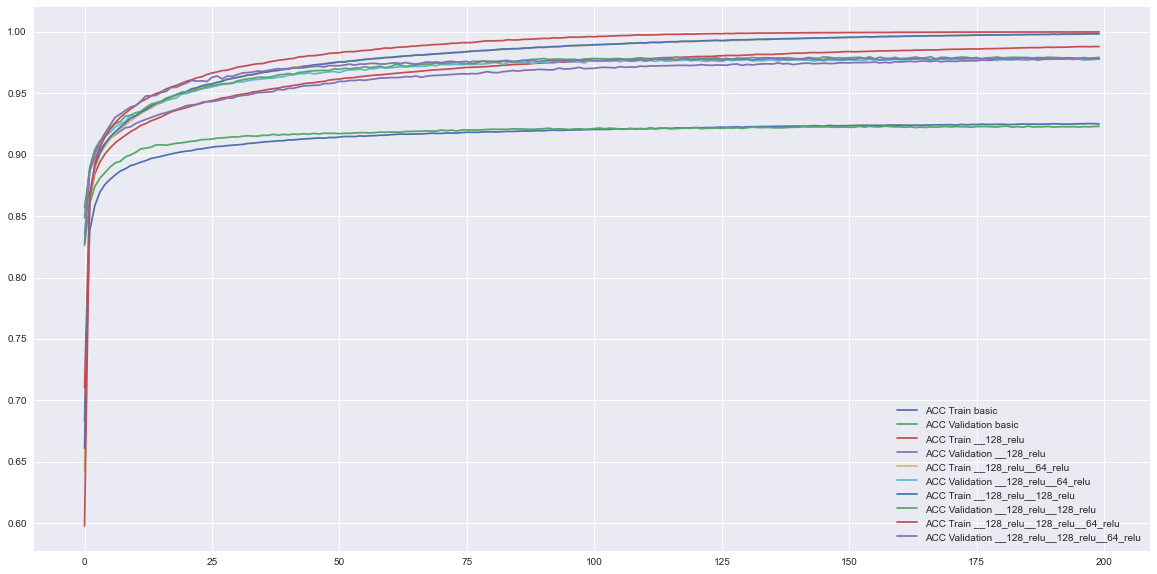

In [48]:
for m_name in data.model.unique():
    m_data = data[data["model"] == m_name]
    epochs_line = range(m_data.shape[0])
    plt.plot(epochs_line, m_data["accuracy"], label="ACC Train {}".format(m_name))
    plt.plot(epochs_line, m_data["val_accuracy"], label="ACC Validation {}".format(m_name))
plt.legend(loc="lower right")

In [56]:
data.groupby("model").max()[["accuracy","val_accuracy"]].sort_values(by=["accuracy","val_accuracy"], ascending=False)

,accuracy,val_accuracy
model,,
__128_relu__128_relu__64_relu,0.999933,0.9787
__128_relu__128_relu,0.998450,0.9797
__128_relu__64_relu,0.998367,0.9785
__128_relu,0.988033,0.9782
basic,0.925283,0.9232


## Loss plots

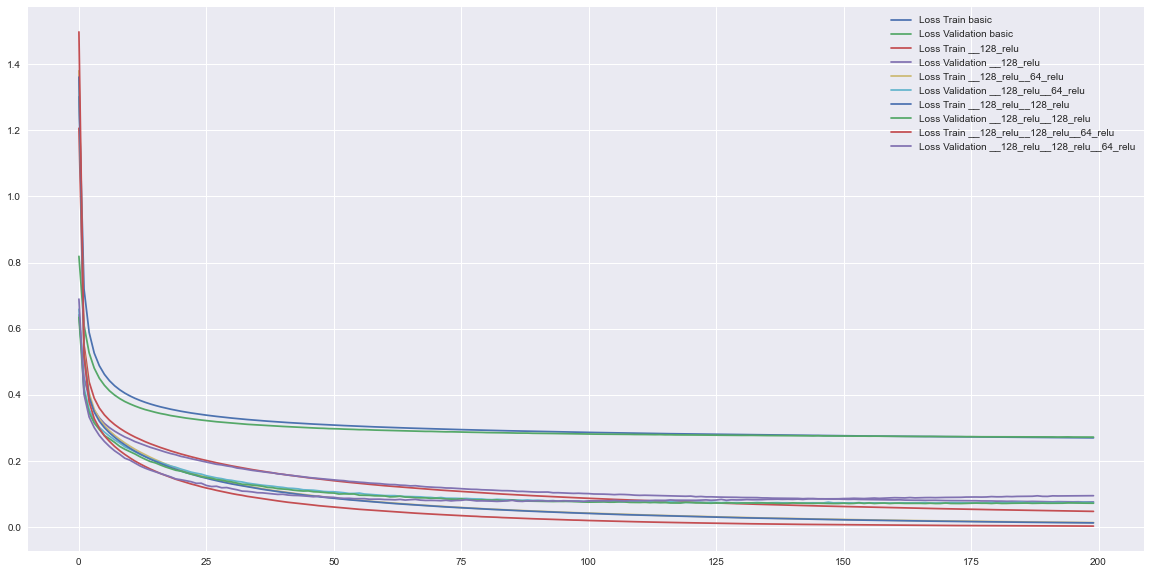

In [49]:
for m_name in data.model.unique():
    m_data = data[data["model"] == m_name]
    epochs_line = range(m_data.shape[0])
    plt.plot(epochs_line, m_data["loss"], label="Loss Train {}".format(m_name))
    plt.plot(epochs_line, m_data["val_loss"], label="Loss Validation {}".format(m_name))
plt.legend(loc="upper right")

In [55]:
data.groupby("model").min()[["loss","val_loss"]].sort_values(by=["loss","val_loss"])

,loss,val_loss
model,,
__128_relu__128_relu__64_relu,0.003230,0.077919
__128_relu__128_relu,0.012902,0.071421
__128_relu__64_relu,0.013757,0.072846
__128_relu,0.047718,0.076204
basic,0.270048,0.272284


In [63]:
data.groupby("model").agg({
        "accuracy":"max",
        "val_accuracy":"max",
        "loss":"min",
        "val_loss":"min"
    }
).sort_values(by=["accuracy","val_accuracy","loss","val_loss"], ascending=[False, False, True, True])

,accuracy,val_accuracy,loss,val_loss
model,,,,
__128_relu__128_relu__64_relu,0.999933,0.9787,0.003230,0.077919
__128_relu__128_relu,0.998450,0.9797,0.012902,0.071421
__128_relu__64_relu,0.998367,0.9785,0.013757,0.072846
__128_relu,0.988033,0.9782,0.047718,0.076204
basic,0.925283,0.9232,0.270048,0.272284
